In [45]:
import pandas as pd
import numpy as np


In [2]:
file_paths1 = [
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-34-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-44-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-49-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-20-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-21-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-42-1/bro/conn.log.labeled"
]

file_paths2 = [
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-60-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-8-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-48-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-9-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-3-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled"
]

file_paths3 = [
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-35-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-39-1/bro/conn.log.labeled",
    "G:/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-7-1/bro/conn.log.labeled"
]
    

In [3]:
column_names = [
    'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 
    'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 
    'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 
    'resp_pkts', 'resp_ip_bytes', 'label'
]

In [4]:
# Initialize an empty list to store dataframes
dataframes = []

# Define a function to read and process the files
def load_and_process_files(file_paths):
    for file_path in file_paths:
        try:
            # Load the file in chunks (you can adjust chunk_size for optimization)
            df = pd.read_table(file_path, skiprows=10, names=column_names, low_memory=False)
            df.drop(df.tail(1).index, inplace=True)  # Drop the last row if it's a footer
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")


In [5]:
# Load the datasets from all file path lists
load_and_process_files(file_paths1)

In [6]:
load_and_process_files(file_paths2)

In [7]:
# Concatenate all dataframes into one
final_df = pd.concat(dataframes, ignore_index=True)

# Optionally, reset the index after concatenation
final_df.reset_index(drop=True, inplace=True)


In [8]:
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19973753 entries, 0 to 19973752
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             object 
 1   uid            object 
 2   id.orig_h      object 
 3   id.orig_p      float64
 4   id.resp_h      object 
 5   id.resp_p      float64
 6   proto          object 
 7   service        object 
 8   duration       object 
 9   orig_bytes     object 
 10  resp_bytes     object 
 11  conn_state     object 
 12  local_orig     object 
 13  local_resp     object 
 14  missed_bytes   float64
 15  history        object 
 16  orig_pkts      float64
 17  orig_ip_bytes  float64
 18  resp_pkts      float64
 19  resp_ip_bytes  float64
 20  label          object 
dtypes: float64(7), object(14)
memory usage: 3.1+ GB


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1545403832.341331,CcFXLynukEDnUlvgl,192.168.1.195,41040.0,185.244.25.235,80.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,- Benign -
1,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040.0,185.244.25.235,80.0,tcp,http,1.477656,149,...,SF,-,-,2896.0,ShADadttcfF,94.0,5525.0,96.0,139044.0,- Benign -
2,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,-,3.147116,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,- Benign -
3,1545403857.781320,CvyynC4Sabj9BNXFRi,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,http,1.305004,151,...,SF,-,-,5792.0,ShADadttcfF,96.0,5699.0,92.0,133140.0,- Benign -
4,1545403859.183341,CWYyiA2sgRijwk2jEd,192.168.1.195,41044.0,185.244.25.235,80.0,tcp,http,1.004605,148,...,SF,-,-,2896.0,ShADadtcfF,67.0,4148.0,65.0,92453.0,- Benign -


In [9]:
final_df['label'].value_counts()

label
-   Malicious   PartOfAHorizontalPortScan          8791200
(empty)   Malicious   PartOfAHorizontalPortScan    7040803
-   Malicious   DDoS                               3592852
(empty)   Benign   -                                498536
-   Benign   -                                       22886
-   Malicious   C&C                                   8641
(empty)   Malicious   C&C                             8238
(empty)   Malicious   Attack                          5962
-   Malicious   Attack                                2752
-   Malicious   C&C-PartOfAHorizontalPortScan          888
-   Malicious   C&C-HeartBeat-Attack                   834
-   Malicious   C&C-HeartBeat                           95
-   Malicious   C&C-Torii                               30
-   Malicious   FileDownload                            14
-   Malicious   C&C-FileDownload                        13
-   Malicious   C&C-HeartBeat-FileDownload               9
Name: count, dtype: int64

In [10]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:  # Exclude object types
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type).startswith('float'):
                df[col] = df[col].astype(np.float32)
    return df

cleaned_df = reduce_memory_usage(final_df)

In [11]:
# Handle missing values by filling them
for column in cleaned_df.columns:
    if cleaned_df[column].dtype in ['float64', 'int64']:  # For numerical columns
        cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)  # Replace with median

In [12]:
# Check for remaining missing values
print(cleaned_df.isnull().sum())

ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64


In [14]:
cleaned_df.to_csv('data.csv', index=False)

In [2]:
df = pd.read_csv('data.csv')

C:\Users\kscna\AppData\Local\Temp\ipykernel_11660\1507164070.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [3]:
df = df.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','local_orig','local_resp','history'])

In [4]:
df.loc[(df.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df.loc[(df.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df.loc[(df.label == '-   Benign   -'), 'label'] = 'Benign'
df.loc[(df.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df.loc[(df.label == '-   Malicious   DDoS'), 'label'] = 'DoS'
df.loc[(df.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df.loc[(df.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   Attack'), 'label'] = 'DoS'
df.loc[(df.label == '(empty)   Malicious   Attack'), 'label'] = 'DoS'
df.loc[(df.label == '-   Malicious   C&C-HeartBeat-Attack'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   C&C-PartOfAHorizontalPortScan'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'

In [9]:
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,-,-,-,-,S0,0.0,1.0,60.0,0.0,0.0,Benign
1,tcp,http,1.477656,149,128252,SF,2896.0,94.0,5525.0,96.0,139044.0,Benign
2,tcp,-,3.147116,0,0,S0,0.0,3.0,180.0,0.0,0.0,Benign
3,tcp,http,1.305004,151,128348,SF,5792.0,96.0,5699.0,92.0,133140.0,Benign
4,tcp,http,1.004605,148,91961,SF,2896.0,67.0,4148.0,65.0,92453.0,Benign


In [10]:
df = pd.get_dummies(df, columns=['proto'])
df = pd.get_dummies(df, columns=['conn_state'])
df = pd.get_dummies(df, columns=['service'])

In [11]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,-,-,-,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
1,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
2,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
3,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
4,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False


In [12]:
# Convert columns to numeric, coercing errors to NaN
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['orig_bytes'] = pd.to_numeric(df['orig_bytes'], errors='coerce')
df['resp_bytes'] = pd.to_numeric(df['resp_bytes'], errors='coerce')

# Replace NaN (which represents '-') with the mean of the respective column
df['duration'] = df['duration'].fillna(df['duration'].mean())
df['orig_bytes'] = df['orig_bytes'].fillna(df['orig_bytes'].mean())
df['resp_bytes'] = df['resp_bytes'].fillna(df['resp_bytes'].mean())


In [13]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0.819620,441.881216,2.426857,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
1,1.477656,149.000000,128252.000000,2896.0,94.0,5525.0,96.0,139044.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
2,3.147116,0.000000,0.000000,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
3,1.305004,151.000000,128348.000000,5792.0,96.0,5699.0,92.0,133140.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
4,1.004605,148.000000,91961.000000,2896.0,67.0,4148.0,65.0,92453.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False


In [14]:
df.isna().sum()

duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
service_-            0
service_dhcp         0
service_dns          0
service_http         0
service_irc          0
service_ssh          0
service_ssl          0
dtype: int64

In [15]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0.819620,441.881216,2.426857,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
1,1.477656,149.000000,128252.000000,2896.0,94.0,5525.0,96.0,139044.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
2,3.147116,0.000000,0.000000,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
3,1.305004,151.000000,128348.000000,5792.0,96.0,5699.0,92.0,133140.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
4,1.004605,148.000000,91961.000000,2896.0,67.0,4148.0,65.0,92453.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19973748,0.819620,441.881216,2.426857,0.0,1.0,40.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
19973749,0.819620,441.881216,2.426857,0.0,1.0,40.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
19973750,0.819620,441.881216,2.426857,0.0,1.0,40.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
19973751,0.819620,441.881216,2.426857,0.0,1.0,40.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False


In [16]:
#drop duplicates
df = df.drop_duplicates()

In [17]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0.819620,441.881216,2.426857,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
1,1.477656,149.000000,128252.000000,2896.0,94.0,5525.0,96.0,139044.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
2,3.147116,0.000000,0.000000,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
3,1.305004,151.000000,128348.000000,5792.0,96.0,5699.0,92.0,133140.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
4,1.004605,148.000000,91961.000000,2896.0,67.0,4148.0,65.0,92453.0,Benign,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969329,33.889773,220.000000,0.000000,0.0,4.0,332.0,0.0,0.0,Benign,True,...,False,False,False,True,False,False,False,False,False,False
19971026,3.009287,0.000000,0.000000,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
19971412,3.280879,120.000000,0.000000,0.0,2.0,176.0,0.0,0.0,Benign,True,...,False,False,False,True,False,False,False,False,False,False
19972661,4.980665,80.000000,0.000000,0.0,2.0,136.0,0.0,0.0,Benign,True,...,False,False,False,True,False,False,False,False,False,False


In [18]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan    63751
Benign                       29623
DoS                           8724
C&C                           7949
FileDownload                    14
Name: count, dtype: int64

In [19]:
df.shape

(110061, 32)

In [20]:
df.columns.tolist()

['duration',
 'orig_bytes',
 'resp_bytes',
 'missed_bytes',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'label',
 'proto_icmp',
 'proto_tcp',
 'proto_udp',
 'conn_state_OTH',
 'conn_state_REJ',
 'conn_state_RSTO',
 'conn_state_RSTOS0',
 'conn_state_RSTR',
 'conn_state_RSTRH',
 'conn_state_S0',
 'conn_state_S1',
 'conn_state_S2',
 'conn_state_S3',
 'conn_state_SF',
 'conn_state_SH',
 'conn_state_SHR',
 'service_-',
 'service_dhcp',
 'service_dns',
 'service_http',
 'service_irc',
 'service_ssh',
 'service_ssl']

In [21]:
df.to_csv('cleaned_data.csv', index=False)

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [46]:
df = pd.read_csv('cleaned_data.csv')

In [47]:
# List of numerical features
numerical_features = [
    'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'
]

# Apply MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [48]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0.000009,2.532517e-07,0.000012,0.000000,1.514524e-08,3.133498e-08,0.000000,0.000000,Benign,False,...,False,False,False,True,False,False,False,False,False,False
1,0.000016,8.539512e-08,0.612006,0.142857,1.423652e-06,2.885429e-06,0.009986,0.267333,Benign,False,...,True,False,False,False,False,False,True,False,False,False
2,0.000034,0.000000e+00,0.000000,0.000000,4.543572e-08,9.400493e-08,0.000000,0.000000,Benign,False,...,False,False,False,True,False,False,False,False,False,False
3,0.000014,8.654136e-08,0.612464,0.285714,1.453943e-06,2.976301e-06,0.009570,0.255981,Benign,False,...,True,False,False,False,False,False,True,False,False,False
4,0.000011,8.482199e-08,0.438829,0.142857,1.014731e-06,2.166291e-06,0.006762,0.177755,Benign,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110056,0.000363,1.260867e-07,0.000000,0.000000,6.058096e-08,1.733869e-07,0.000000,0.000000,Benign,True,...,False,False,False,True,False,False,False,False,False,False
110057,0.000032,0.000000e+00,0.000000,0.000000,4.543572e-08,9.400493e-08,0.000000,0.000000,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
110058,0.000035,6.877459e-08,0.000000,0.000000,3.029048e-08,9.191593e-08,0.000000,0.000000,Benign,True,...,False,False,False,True,False,False,False,False,False,False
110059,0.000053,4.584973e-08,0.000000,0.000000,3.029048e-08,7.102595e-08,0.000000,0.000000,Benign,True,...,False,False,False,True,False,False,False,False,False,False


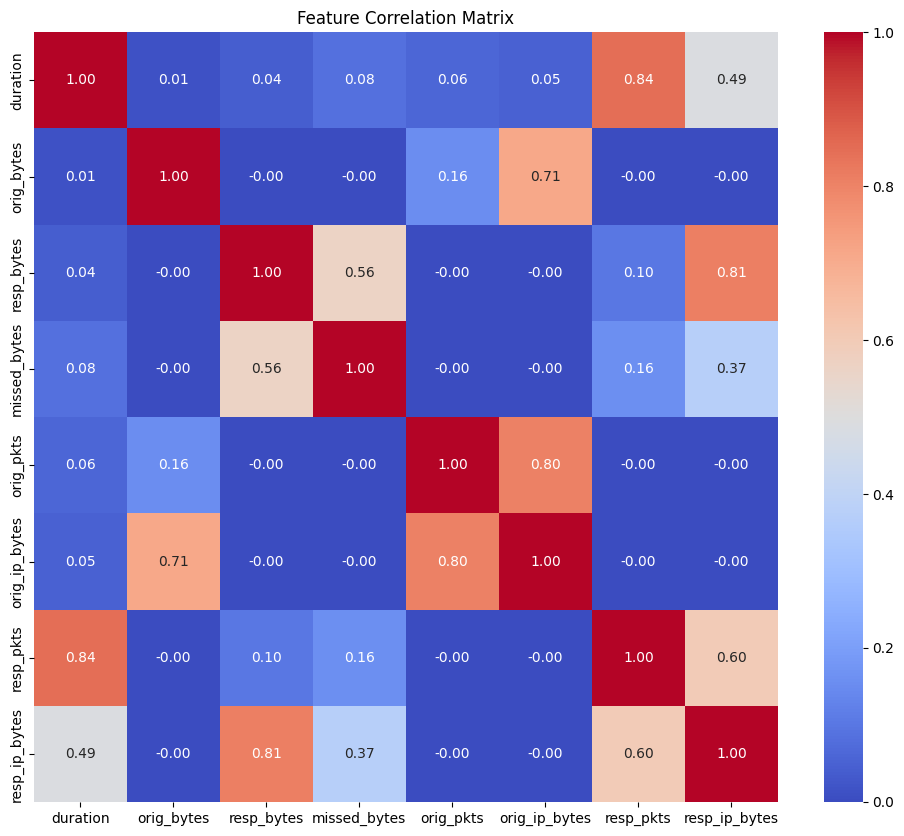

In [49]:
# Ensure only numeric columns are included in the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [50]:
# Drop highly correlated features based on the analysis
df = df.drop(columns=['orig_ip_bytes', 'resp_ip_bytes'])


In [34]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,resp_pkts,label,proto_icmp,proto_tcp,proto_udp,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0.000009,2.532517e-07,0.000012,0.000000,1.514524e-08,0.000000,Benign,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,0.000016,8.539512e-08,0.612006,0.142857,1.423652e-06,0.009986,Benign,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,0.000034,0.000000e+00,0.000000,0.000000,4.543572e-08,0.000000,Benign,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,0.000014,8.654136e-08,0.612464,0.285714,1.453943e-06,0.009570,Benign,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.000011,8.482199e-08,0.438829,0.142857,1.014731e-06,0.006762,Benign,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110056,0.000363,1.260867e-07,0.000000,0.000000,6.058096e-08,0.000000,Benign,True,False,False,...,False,False,False,True,False,False,False,False,False,False
110057,0.000032,0.000000e+00,0.000000,0.000000,4.543572e-08,0.000000,PartOfAHorizontalPortScan,False,True,False,...,False,False,False,True,False,False,False,False,False,False
110058,0.000035,6.877459e-08,0.000000,0.000000,3.029048e-08,0.000000,Benign,True,False,False,...,False,False,False,True,False,False,False,False,False,False
110059,0.000053,4.584973e-08,0.000000,0.000000,3.029048e-08,0.000000,Benign,True,False,False,...,False,False,False,True,False,False,False,False,False,False


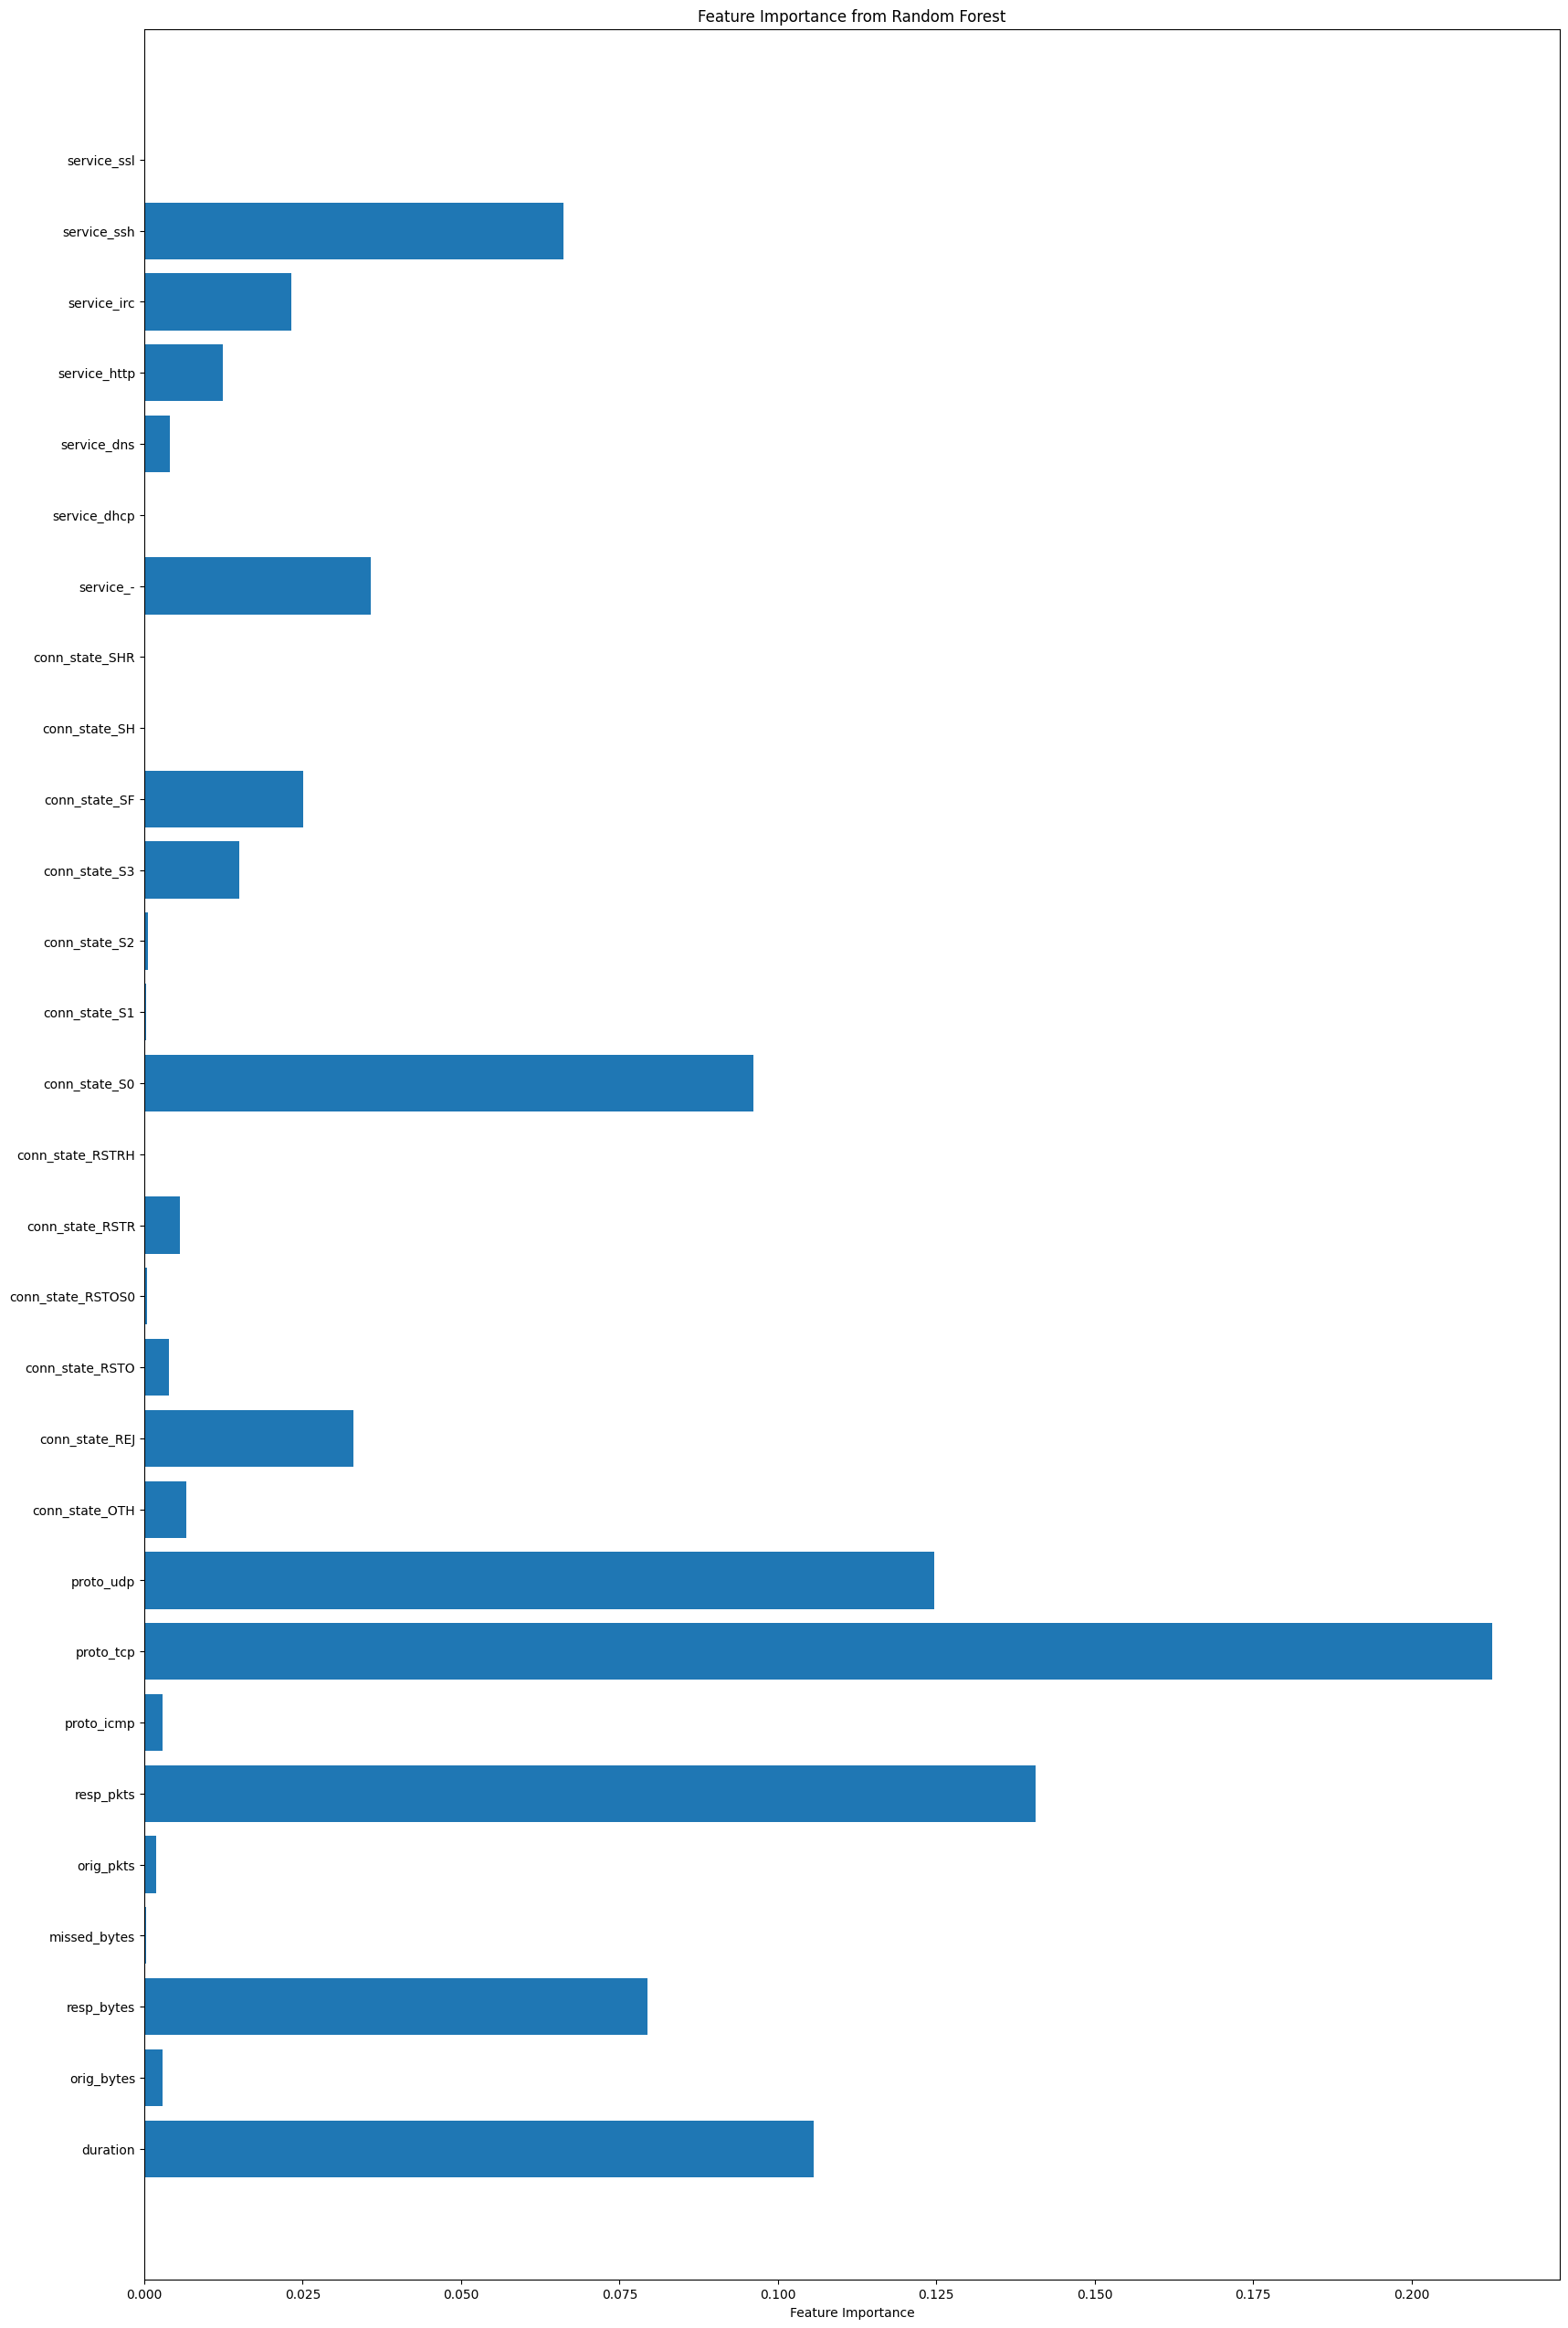

In [51]:
# Define features and labels
X = df.drop('label', axis=1)
y = df['label']

# Fit a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importances
plt.figure(figsize=(20, 32))
importances = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [52]:
# Drop low-importance features
low_importance_features = ['conn_state_SHR', 'conn_state_SH', 'conn_state_RSTRH', 'service_ssl', 'service_dhcp', 'service_-' ]
df = df.drop(columns=low_importance_features)


In [54]:
df.columns.to_list()

['duration',
 'orig_bytes',
 'resp_bytes',
 'missed_bytes',
 'orig_pkts',
 'resp_pkts',
 'label',
 'proto_icmp',
 'proto_tcp',
 'proto_udp',
 'conn_state_OTH',
 'conn_state_REJ',
 'conn_state_RSTO',
 'conn_state_RSTOS0',
 'conn_state_RSTR',
 'conn_state_S0',
 'conn_state_S1',
 'conn_state_S2',
 'conn_state_S3',
 'conn_state_SF',
 'service_dns',
 'service_http',
 'service_irc',
 'service_ssh']

In [55]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,resp_pkts,label,proto_icmp,proto_tcp,proto_udp,...,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,service_dns,service_http,service_irc,service_ssh
0,0.000009,2.532517e-07,0.000012,0.000000,1.514524e-08,0.000000,Benign,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,0.000016,8.539512e-08,0.612006,0.142857,1.423652e-06,0.009986,Benign,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,0.000034,0.000000e+00,0.000000,0.000000,4.543572e-08,0.000000,Benign,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,0.000014,8.654136e-08,0.612464,0.285714,1.453943e-06,0.009570,Benign,False,True,False,...,False,False,False,False,False,True,False,True,False,False
4,0.000011,8.482199e-08,0.438829,0.142857,1.014731e-06,0.006762,Benign,False,True,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110056,0.000363,1.260867e-07,0.000000,0.000000,6.058096e-08,0.000000,Benign,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110057,0.000032,0.000000e+00,0.000000,0.000000,4.543572e-08,0.000000,PartOfAHorizontalPortScan,False,True,False,...,False,True,False,False,False,False,False,False,False,False
110058,0.000035,6.877459e-08,0.000000,0.000000,3.029048e-08,0.000000,Benign,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110059,0.000053,4.584973e-08,0.000000,0.000000,3.029048e-08,0.000000,Benign,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df.to_csv('final_data.csv', index=False)

In [23]:
#done